In [56]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path

DATA = Path("data/set.csv")

# Load dataset from CSV
df = pd.read_csv(DATA)


In [33]:
df.head(5)

,id,month,age,sex,height_cm,weight_kg,bmi,body_fat_pct,weekly_workouts,steps_per_day,...,run_5k_min,resting_hr,systolic_bp,diastolic_bp,bench_1rm_kg,squat_1rm_kg,max_pushups,ldl_mg_dL,hdl_mg_dL,triglycerides_mg_dL
0,1,2024-01,61,male,186.5,107.2,30.8,34.3,4,9912,...,28.13,66,169,103,137.0,211.2,32,120,42,113
1,1,2024-02,61,male,186.5,106.8,30.7,33.1,4,12406,...,24.12,68,168,102,133.4,215.4,35,118,33,111
2,1,2024-03,61,male,186.5,106.9,30.7,34.7,4,11395,...,25.64,68,171,96,135.9,207.0,39,120,43,110
3,1,2024-04,61,male,186.5,107.1,30.8,33.7,4,11301,...,23.25,69,163,110,129.8,201.7,43,119,35,124
4,1,2024-05,61,male,186.5,109.6,31.5,32.5,4,13080,...,24.81,67,166,109,132.4,214.4,39,124,41,107


In [34]:
print("-----------------")
df.info()
print("-----------------")
df.nunique()


-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      12000 non-null  int64  
 1   month                   12000 non-null  object 
 2   age                     12000 non-null  int64  
 3   sex                     12000 non-null  object 
 4   height_cm               12000 non-null  float64
 5   weight_kg               12000 non-null  float64
 6   bmi                     12000 non-null  float64
 7   body_fat_pct            12000 non-null  float64
 8   weekly_workouts         12000 non-null  int64  
 9   steps_per_day           12000 non-null  int64  
 10  sleep_hours             12000 non-null  float64
 11  stress_level            12000 non-null  float64
 12  calorie_intake          12000 non-null  int64  
 13  protein_g               12000 non-null  int64  
 14  alcohol_units_per_we

id                        1000
month                       12
age                         48
sex                          2
height_cm                  357
weight_kg                  699
bmi                        205
body_fat_pct               434
weekly_workouts             11
steps_per_day             6971
sleep_hours                535
stress_level                66
calorie_intake            1566
protein_g                  159
alcohol_units_per_week     196
smoker                       2
vo2max                     488
run_5k_min                2462
resting_hr                  53
systolic_bp                 81
diastolic_bp                55
bench_1rm_kg              1182
squat_1rm_kg              1670
max_pushups                 84
ldl_mg_dL                   75
hdl_mg_dL                   52
triglycerides_mg_dL        153
dtype: int64

In [35]:
df.isna().sum().sort_values(ascending=False)

id                        0
alcohol_units_per_week    0
hdl_mg_dL                 0
ldl_mg_dL                 0
max_pushups               0
squat_1rm_kg              0
bench_1rm_kg              0
diastolic_bp              0
systolic_bp               0
resting_hr                0
run_5k_min                0
vo2max                    0
smoker                    0
protein_g                 0
month                     0
calorie_intake            0
stress_level              0
sleep_hours               0
steps_per_day             0
weekly_workouts           0
body_fat_pct              0
bmi                       0
weight_kg                 0
height_cm                 0
sex                       0
age                       0
triglycerides_mg_dL       0
dtype: int64

                 id           age     height_cm     weight_kg           bmi  \
count  12000.000000  12000.000000  12000.000000  12000.000000  12000.000000   
mean     500.500000     40.799000    168.556100     69.988117     24.513042   
std      288.687019     14.050803      9.148958     14.036315      3.828020   
min        1.000000     18.000000    145.400000     40.000000     15.900000   
25%      250.750000     28.000000    161.700000     59.500000     22.000000   
50%      500.500000     41.000000    167.900000     69.200000     24.400000   
75%      750.250000     53.000000    175.025000     79.700000     27.200000   
max     1000.000000     65.000000    196.400000    117.800000     37.900000   

       body_fat_pct  weekly_workouts  steps_per_day   sleep_hours  \
count  12000.000000      12000.00000   12000.000000  12000.000000   
mean      28.189858          3.25700    9730.717083      7.041228   
std        7.939412          1.83009    2657.322784      1.037081   
min        5

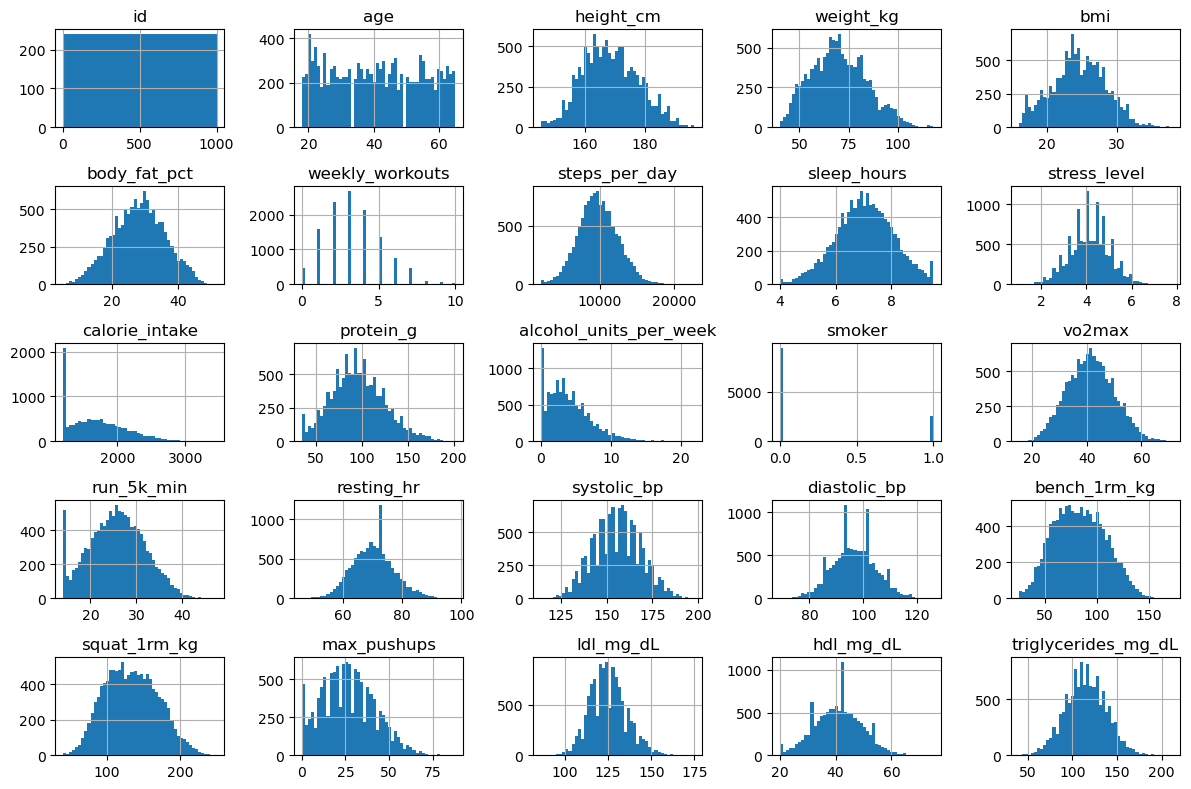

In [36]:
print(df.describe())
df.hist(bins=50, figsize=(12, 8))
# Configure Matplotlib plot
plt.tight_layout()

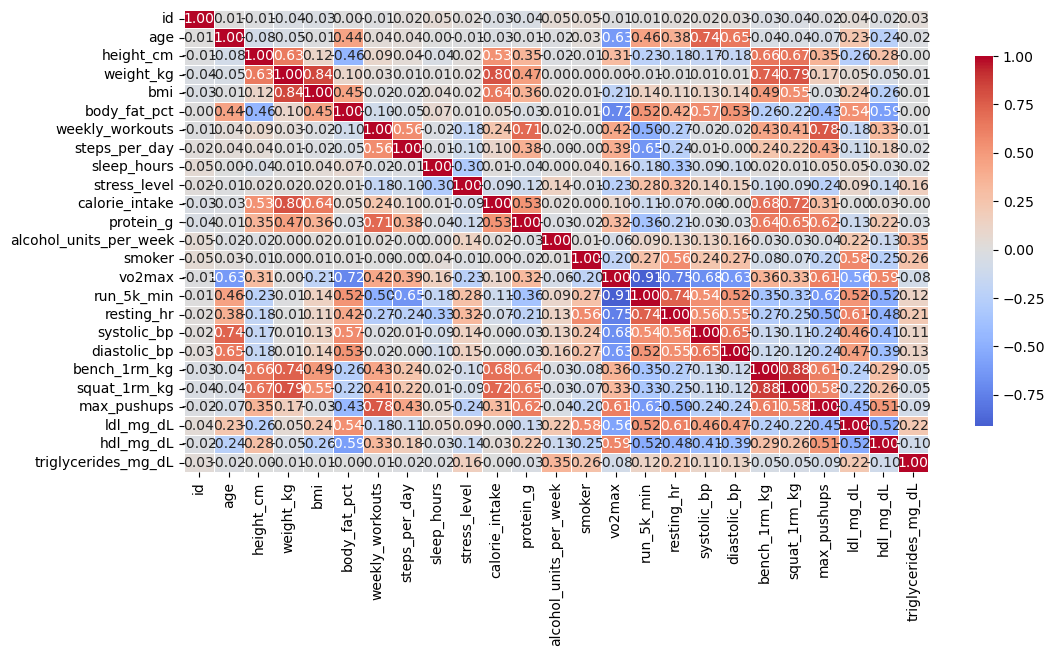

In [60]:
only_num = df.select_dtypes(include='number')

# Configure Matplotlib plot
plt.figure(figsize=(12, 6))
# Plot with Seaborn
sns.heatmap(
    only_num.corr(),
    annot=True,
    fmt=".2f",  # round to two decimals
    cmap="coolwarm",  # use a more contrasted palette
    center=0,  # center the color scale at zero
    linewidths=0.5,  # add divider lines
    cbar_kws={"shrink": 0.8}  # compact colorbar
)
# Configure Matplotlib plot
plt.grid(False)
# Save figure to file
plt.savefig("out/img/heatmap.png", dpi=300, bbox_inches="tight")
# Configure Matplotlib plot
plt.show()

